In [4]:
import torch 
torch.cuda.is_available()

True

In [14]:
# !pip install fastai==2.5.3
!cd OIDv4_ToolKit && pip install -r requirements.txt
!cd OIDv4_ToolKit && python main.py -h

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.9 MB 4.5 MB/s 
     |████████████████████████████████| 9.9 MB 39.5 MB/s 
     |████████████████████████████████| 636 kB 64.2 MB/s 
     |████████████████████████████████| 548 kB 56.9 MB/s 
     |████████████████████████████████| 79 kB 10.8 MB/s 
     |████████████████████████████████| 140 kB 70.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: docutils
    Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:


In [15]:
import fastai
from ipywidgets import widgets

In [16]:
# !git clone https://github.com/EscVM/OIDv4_ToolKit.git
# !cd OIDv4_ToolKit && py

In [20]:
!cd OIDv4_ToolKit && python main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 43155 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

#Model

In [22]:
from numpy import matrix
from fastai.vision.all import *
from ipywidgets import widgets

path = Path("train")

transports = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y = parent_label,
    item_tfms=Resize(224)
)

dls = transports.dataloaders(path)

# dls.train.show_batch(max_n=32, nrows = 4)
learn = cnn_learner(dls, resnet34, metrics = accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  # Cell
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.320615,0.424235,0.850000,00:16


epoch,train_loss,valid_loss,accuracy,time
0,0.412646,0.294944,0.916667,00:11
1,0.293133,0.294649,0.908333,00:11
2,0.197524,0.297590,0.891667,00:12
3,0.147231,0.298441,0.891667,00:11


# Testing

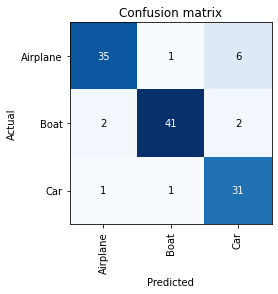

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

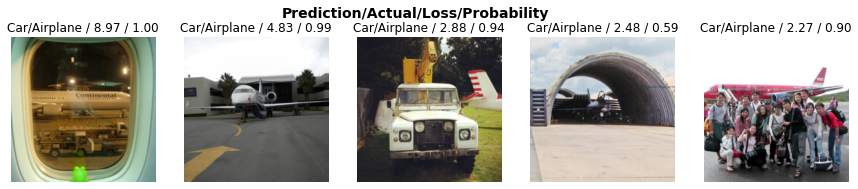

In [24]:
interp.plot_top_losses(5, nrows = 1)

In [27]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"bashorat:{pred}")
print(f"ehtimoligi:{probs[pred_id]*100:.1f}%")
img

In [35]:
learn.export('transport_model.pkl')


In [36]:
model = load_learner("/content/transport_model.pkl")